# Part I

## • Perform data wrangling with R or Python for the dataset provided in week 3 (Clinic_Patients_messy.csv).

In [2]:
import pandas as pd

In [3]:
messy_df = pd.read_csv("Clinic_Patients_messy.csv")

In [4]:
messy_df.head()

,Patient_ID,Height,Weight,Gender,Systolic_BP&Diastolic_BP,Age
0,1,166.0,89.0,Male,160/110,52
1,2,173.0,75.0,Female,145/74,30
2,3,209.0,92.0,Female,150/95,41
3,4,175.0,79.0,Female,135/90,25 years
4,5,177.0,82.0,Male,145/90,63


### 1. Split Systolic_BP&Diastolic_BP into two columns

In [5]:
messy_df[['Systolic_BP', 'Diastolic_BP']] = messy_df['Systolic_BP&Diastolic_BP'].str.split('/', expand = True)
messy_df.drop(['Systolic_BP&Diastolic_BP'], axis = 1, inplace = True)

In [6]:
messy_df['Systolic_BP'] = pd.to_numeric(messy_df['Systolic_BP'])
messy_df['Diastolic_BP'] = pd.to_numeric(messy_df['Diastolic_BP'])

In [7]:
messy_df.head()

,Patient_ID,Height,Weight,Gender,Age,Systolic_BP,Diastolic_BP
0,1,166.0,89.0,Male,52,160,110
1,2,173.0,75.0,Female,30,145,74
2,3,209.0,92.0,Female,41,150,95
3,4,175.0,79.0,Female,25 years,135,90
4,5,177.0,82.0,Male,63,145,90


### 2. Remove 'years' in Age column

In [8]:
messy_df['Age'] = messy_df['Age'].str.replace(' years', '', regex = False)

In [9]:
messy_df.iloc[85:100]

,Patient_ID,Height,Weight,Gender,Age,Systolic_BP,Diastolic_BP
85,86,NaN,NaN,Male,70,108,75
86,87,219.0,95.0,Male,64,130,76
87,88,198.0,135.0,Male,183,176,96
88,89,171.0,83.0,Female,59,130,70
89,90,217.0,127.0,Female,52,168,106
90,91,215.0,81.0,Female,63,108,77
91,92,190.0,107.0,Female,70,140,108
92,93,208.0,98.0,Female,58,145,94
93,94,195.0,91.0,Male,62,150,107
94,95,218.0,141.0,Male,55,121,96


### 3. Remove null weight

In [10]:
messy_df = messy_df[messy_df['Weight'].notna()]
# eg. 65			Female	160/74	27 is deleted
messy_df.iloc[50:70]

,Patient_ID,Height,Weight,Gender,Age,Systolic_BP,Diastolic_BP
50,51,192.0,136.0,Male,34,179,83
51,52,213.0,132.0,Male,55,166,100
52,53,201.0,117.0,Female,47,130,71
53,54,212.0,127.0,Female,68,126,76
54,55,190.0,89.0,Female,35,144,100
55,56,191.0,137.0,Female,46,105,73
56,57,200.0,119.0,Female,56,140,86
57,58,200.0,123.0,Male,51,160,106
58,59,173.0,113.0,Male,69,164,88
59,60,220.0,135.0,Male,44,150,89


### 4. Remove null Height

In [11]:
messy_df = messy_df[messy_df['Height'].notna()]
# eg. 65			Female	160/74	27 is deleted
messy_df.iloc[50:70]

,Patient_ID,Height,Weight,Gender,Age,Systolic_BP,Diastolic_BP
50,51,192.0,136.0,Male,34,179,83
51,52,213.0,132.0,Male,55,166,100
52,53,201.0,117.0,Female,47,130,71
53,54,212.0,127.0,Female,68,126,76
54,55,190.0,89.0,Female,35,144,100
55,56,191.0,137.0,Female,46,105,73
56,57,200.0,119.0,Female,56,140,86
57,58,200.0,123.0,Male,51,160,106
58,59,173.0,113.0,Male,69,164,88
59,60,220.0,135.0,Male,44,150,89


### 5. Update data types of ''Weight' and 'Height' from float64 to int64

In [12]:
messy_df = messy_df[messy_df['Weight'].notna()]
messy_df = messy_df[messy_df['Height'].notna()]

In [13]:
messy_df['Weight'] = messy_df['Weight'].astype(int)
messy_df['Height'] = messy_df['Height'].astype(int)

In [14]:
messy_df.dtypes

Patient_ID       int64
Height           int64
Weight           int64
Gender          object
Age             object
Systolic_BP      int64
Diastolic_BP     int64
dtype: object

# Part II

## • Look for and download 1 healthcare dataset.

In [15]:
# reference : https://data.world/chhs/06ed38d3-b047-4ae2-aa00-2e43b5491d6e
# df = pd.read_csv("ischemic-stroke.csv", encoding='cp1252')

df = pd.read_csv("ischemic-stroke.csv")

In [16]:
df.head()

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,Location 1
0,2011-2012,NaN,Statewide,NaN,30-day Mortality,10.55,7406.0,70213.0,NaN,NaN
1,2011-2012,NaN,Statewide,NaN,30-day Readmission,12.80,8527.0,66612.0,NaN,NaN
2,2011-2012,Alameda,Alameda Hospital,106010735,30-day Readmission,18.66,18.0,92.0,As Expected,"(37.762953, -122.25362)"
3,2011-2012,Alameda,Alameda Hospital,106010735,30-day Mortality,12.22,12.0,95.0,As Expected,"(37.762953, -122.25362)"
4,2011-2012,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Readmission,11.91,34.0,281.0,As Expected,"(37.85633, -122.25784)"


In [17]:
df.dtypes

Year                         object
County                       object
Hospital                     object
OSHPDID                      object
Measure                      object
Risk Adjusted Rate          float64
# of Deaths/Readmissions    float64
# of Cases                  float64
Hospital Ratings             object
Location 1                   object
dtype: object

## • Perform data wrangling with R or Python for that dataset.

### o It should have at least 5 data wrangling tasks.

### 1. Delete rows with county name is null, which is state wide value

In [18]:
df = df[df['County'].notna()]

In [19]:
df.head()

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,Location 1
2,2011-2012,Alameda,Alameda Hospital,106010735,30-day Readmission,18.66,18.0,92.0,As Expected,"(37.762953, -122.25362)"
3,2011-2012,Alameda,Alameda Hospital,106010735,30-day Mortality,12.22,12.0,95.0,As Expected,"(37.762953, -122.25362)"
4,2011-2012,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Readmission,11.91,34.0,281.0,As Expected,"(37.85633, -122.25784)"
5,2011-2012,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Mortality,9.82,24.0,287.0,As Expected,"(37.85633, -122.25784)"
6,2011-2012,Alameda,Eden Medical Center,106010805,30-day Mortality,12.36,53.0,399.0,As Expected,"(37.69871, -122.08753)"


### 2. Replace rating into number (Better: 1, As Expected : 0, Worse: -1)

In [20]:
df['Hospital Ratings'] = df['Hospital Ratings'].replace(['Better','As Expected','Worse'],[1,0,-1])

In [21]:
df['Hospital Ratings'].value_counts()

 0.0    2029
-1.0      74
 1.0      67
Name: Hospital Ratings, dtype: int64

### 3. Split Location 1 into two columns

In [22]:
df[['longitude', 'latitude']] = df['Location 1'].str.split(',', expand = True)
df.drop(['Location 1'], axis = 1, inplace = True)

In [23]:
df['longitude'] = df['longitude'].map(lambda x: str(x)[1:]) # delete '('
df['latitude'] = df['latitude'].map(lambda x: str(x)[:-1]) # delete ')'

df.head()

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,longitude,latitude
2,2011-2012,Alameda,Alameda Hospital,106010735,30-day Readmission,18.66,18.0,92.0,0.0,37.762953,-122.25362
3,2011-2012,Alameda,Alameda Hospital,106010735,30-day Mortality,12.22,12.0,95.0,0.0,37.762953,-122.25362
4,2011-2012,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Readmission,11.91,34.0,281.0,0.0,37.85633,-122.25784
5,2011-2012,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Mortality,9.82,24.0,287.0,0.0,37.85633,-122.25784
6,2011-2012,Alameda,Eden Medical Center,106010805,30-day Mortality,12.36,53.0,399.0,0.0,37.69871,-122.08753


In [24]:
df['longitude']

2       37.762953
3       37.762953
4        37.85633
5        37.85633
6        37.69871
          ...    
2183     38.66284
2184     38.56154
2185     38.56154
2186    39.138222
2187    39.138222
Name: longitude, Length: 2186, dtype: object

In [25]:
df['latitude']

2        -122.25362
3        -122.25362
4        -122.25784
5        -122.25784
6        -122.08753
           ...     
2183      -121.7933
2184     -121.77244
2185     -121.77244
2186    -121.594363
2187    -121.594363
Name: latitude, Length: 2186, dtype: object

In [26]:
# transform from object to number
df["longitude"] = pd.to_numeric(df["longitude"], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [27]:
df.dtypes

Year                         object
County                       object
Hospital                     object
OSHPDID                      object
Measure                      object
Risk Adjusted Rate          float64
# of Deaths/Readmissions    float64
# of Cases                  float64
Hospital Ratings            float64
longitude                   float64
latitude                    float64
dtype: object

### 4. Update year from start year - end year to start year only

In [28]:
df['Year'] = df['Year'].str.split('-', expand = True)[0]

In [29]:
df.head()

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,longitude,latitude
2,2011,Alameda,Alameda Hospital,106010735,30-day Readmission,18.66,18.0,92.0,0.0,37.762953,-122.25362
3,2011,Alameda,Alameda Hospital,106010735,30-day Mortality,12.22,12.0,95.0,0.0,37.762953,-122.25362
4,2011,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Readmission,11.91,34.0,281.0,0.0,37.856330,-122.25784
5,2011,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739,30-day Mortality,9.82,24.0,287.0,0.0,37.856330,-122.25784
6,2011,Alameda,Eden Medical Center,106010805,30-day Mortality,12.36,53.0,399.0,0.0,37.698710,-122.08753


### 5. Update data types of '# of Deaths/Readmissions', '# of Cases' from float64 to int64

In [30]:
df = df[df['# of Deaths/Readmissions'].notna()]
df = df[df['# of Cases'].notna()]

In [31]:
df['# of Deaths/Readmissions'] = df['# of Deaths/Readmissions'].astype(int)
df['# of Cases'] = df['# of Cases'].astype(int)

In [32]:
df.dtypes

Year                         object
County                       object
Hospital                     object
OSHPDID                      object
Measure                      object
Risk Adjusted Rate          float64
# of Deaths/Readmissions      int64
# of Cases                    int64
Hospital Ratings            float64
longitude                   float64
latitude                    float64
dtype: object

### 6. Use Boxplots to identify outliers of column "Risk Adjusted Rate".

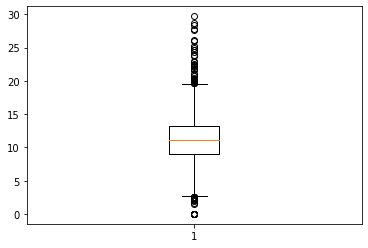

In [36]:
import matplotlib.pyplot as plt

plt.boxplot(df["Risk Adjusted Rate"])
plt.show()